In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime


In [2]:
df = pd.read_csv("./data/01_input_history.csv")

In [3]:
df

,Country,Product,Month,Quantity
0,Japan,MorningMint,Jan2004,0
1,Japan,MorningMint,Feb2004,0
2,Japan,MorningMint,Mar2004,0
3,Japan,MorningMint,Apr2004,0
4,Japan,MorningMint,May2004,0
...,...,...,...,...
239995,Russia,HydratingHoney Pet Wipes,Aug2023,0
239996,Russia,HydratingHoney Pet Wipes,Sep2023,0
239997,Russia,HydratingHoney Pet Wipes,Oct2023,0
239998,Russia,HydratingHoney Pet Wipes,Nov2023,0


In [4]:
df['date'] = pd.to_datetime(df['Month'], format='%b%Y')

In [5]:
df

,Country,Product,Month,Quantity,date
0,Japan,MorningMint,Jan2004,0,2004-01-01
1,Japan,MorningMint,Feb2004,0,2004-02-01
2,Japan,MorningMint,Mar2004,0,2004-03-01
3,Japan,MorningMint,Apr2004,0,2004-04-01
4,Japan,MorningMint,May2004,0,2004-05-01
...,...,...,...,...,...
239995,Russia,HydratingHoney Pet Wipes,Aug2023,0,2023-08-01
239996,Russia,HydratingHoney Pet Wipes,Sep2023,0,2023-09-01
239997,Russia,HydratingHoney Pet Wipes,Oct2023,0,2023-10-01
239998,Russia,HydratingHoney Pet Wipes,Nov2023,0,2023-11-01


<Axes: xlabel='date', ylabel='Quantity'>

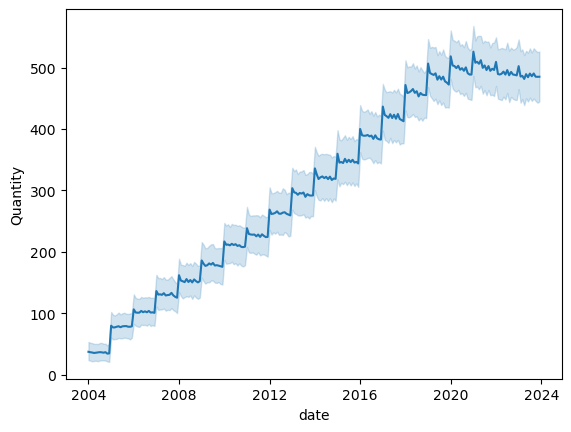

In [6]:
sns.lineplot(data=df, x='date', y='Quantity')

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OrdinalEncoder

In [9]:
df = df.drop(columns=["Month"])

In [10]:
X = df.drop(columns=["Quantity"])

In [11]:
X[['Country']] = OrdinalEncoder().fit_transform(X[['Country']])

In [12]:
X

,Country,Product,date
0,6.0,MorningMint,2004-01-01
1,6.0,MorningMint,2004-02-01
2,6.0,MorningMint,2004-03-01
3,6.0,MorningMint,2004-04-01
4,6.0,MorningMint,2004-05-01
...,...,...,...
239995,7.0,HydratingHoney Pet Wipes,2023-08-01
239996,7.0,HydratingHoney Pet Wipes,2023-09-01
239997,7.0,HydratingHoney Pet Wipes,2023-10-01
239998,7.0,HydratingHoney Pet Wipes,2023-11-01


In [13]:
X[['Product']] = OrdinalEncoder().fit_transform(X[['Product']])

In [14]:
X['Year'] = X['date'].dt.year
X['Month'] = X['date'].dt.month

In [15]:
X

,Country,Product,date,Year,Month
0,6.0,53.0,2004-01-01,2004,1
1,6.0,53.0,2004-02-01,2004,2
2,6.0,53.0,2004-03-01,2004,3
3,6.0,53.0,2004-04-01,2004,4
4,6.0,53.0,2004-05-01,2004,5
...,...,...,...,...,...
239995,7.0,47.0,2023-08-01,2023,8
239996,7.0,47.0,2023-09-01,2023,9
239997,7.0,47.0,2023-10-01,2023,10
239998,7.0,47.0,2023-11-01,2023,11


In [16]:
X = X.drop(columns='date')

In [17]:
y = df['Quantity']

In [18]:
DT = DecisionTreeRegressor().fit(X, y)

In [19]:
y_hat = DT.predict(X)

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y, y_hat)

1.0

In [22]:
df = pd.read_csv("./data/01_input_history.csv")

In [23]:
def preprocess_dataset(df_old):
    """
    INPUT:
        - original dataset
        
    RETURNS:
        - processed dataset
        - ordinal encoder of country
        - ordinal encoder of product
    """
    df = df_old.copy()


    df['date'] = pd.to_datetime(df['Month'], format='%b%Y')
    df['Year'] = df['date'].dt.year
    df['Month'] = df['date'].dt.month

    product_encoder = OrdinalEncoder().fit(df[['Product']])
    country_encoder = OrdinalEncoder().fit(df[['Country']])

    df[['Product']] = product_encoder.transform(df[['Product']])
    df[['Country']] = country_encoder.transform(df[['Country']])
    
    df = df.drop(columns=['date'])

    return df, product_encoder, country_encoder


In [24]:
df_preprocessed, product_encoder, country_encoder = preprocess_dataset(df)

In [25]:
X = df_preprocessed.drop(columns='Quantity')
y = df_preprocessed['Quantity']

In [26]:
from sklearn.model_selection import TimeSeriesSplit

In [27]:
splitter = TimeSeriesSplit()

In [47]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [44]:
from sklearn.metrics import mean_squared_error

In [50]:
r2_scores = []
for train_idx, test_idx in splitter.split(X, y):
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]

    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    DT = RandomForestRegressor().fit(X_train, y_train)

    y_hat_test = DT.predict(X_test)
    r2_scores.append(score_i := r2_score(y_test, y_hat_test))
    print(score_i)

-0.5019857016745537
-0.6398296756585158
-1.0653951657733312
-1.180836118000785
-0.6508470694282407


In [49]:
r2_scores

[-0.09977981076966391,
 0.039897011598403864,
 -0.242090082599687,
 -0.25100944679969217,
 0.05869798290273465]

In [32]:
X_train, X_test, y_train, y_test = TimeSeriesSplit(X, y, test_size=0.33)

TypeError: TimeSeriesSplit.__init__() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [80]:
X_train

,Country,Product,Month,Year
96835,5.0,9.0,8,2013
213906,9.0,88.0,7,2009
120615,8.0,82.0,4,2015
77141,2.0,76.0,6,2012
109102,5.0,58.0,11,2015
...,...,...,...,...
119879,5.0,47.0,12,2013
103694,5.0,66.0,3,2005
131932,8.0,79.0,5,2018
146867,3.0,81.0,12,2022


In [68]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai